In [ ]:
Cross VAlidation

In [4]:
import pandas as pd 
import numpy as np
from sklearn import model_selection

train_data = pd.read_csv('C:\home\jupyter\data\d_train.csv', index_col = 'Id')
test_data = pd.read_csv('C:\home\jupyter\data\d_test.csv', index_col = 'Id')

train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y=train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)


numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]

X=train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()



In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()), ('model', RandomForestRegressor(n_estimators=50, random_state=0))])

In [9]:
from sklearn.model_selection import cross_val_score

# se multiplica por -1 pues sklearn calcular el MAE negativo

scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

print(scores)
print(scores.mean())
print(scores.min())  



[18549.88568493 17896.67034247 18462.68472603 16587.02472603
 19885.78630137]
18276.410356164386
16587.024726027397


evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary `results`, where `results[i]` is the average MAE returned by `get_scores(i)`.

In [10]:
def get_score(n_estimators):
    
    my_pipeline = Pipeline([('preprocessing', SimpleImputer()), ('model', RandomForestRegressor(n_estimators, random_state = 0))])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    average = scores.mean()
    # Replace this body with your own code
    return average

In [12]:
number_of_trees = [50,100,150,200,250,300,350,400]
results={}
for i in number_of_trees:
    results[i] = get_score(i)
results

{50: 18353.8393511688,
 100: 18395.2151680032,
 150: 18288.730020956387,
 200: 18248.345889801505,
 250: 18255.26922247291,
 300: 18275.241922621914,
 350: 18270.29183308043,
 400: 18270.197974402367}

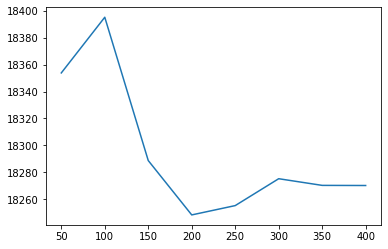

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()